<a href="https://colab.research.google.com/github/Dingcyber/Studymaterials/blob/main/Mathematics%20for%20ML/Probability%26Statistics_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 工具集（toolkit）

## Matplotlib

---

* `%matplotlib widget`: 魔法命令，用于在Jupyter Notebook|Lab中启用交互式matplotlib绘图
* `.set_title()`: 坐标轴对象`Axes`的方法，用于设置图表的标题
* `.scatter(x,y,s=None,c=None,marker=None,alpha=None,**kwargs)`: 绘制散点图的方法，用于在二维平面上显示数据点的分布。当参数设置为`None`时，`Matplotlib`会使用内部的默认值
  * `x,y`: 数组，数据点的x，y坐标，必需
  * `s`: 标量或数组，点的大小，默认值为20
  * `c`: 字符串，点的颜色，默认值为`"b"`蓝色
  * `marker`: 字符串，点的形状，默认值为`"o"`圆形
  * `alpha`: 透明度（0-1），默认值为1（不透明）
  * `label`: 图例标签，默认值为None
* `.clear()`: 坐标轴对象`Axes`的方法，用于清除坐标轴上的所有内容，直接调用，不需要任何参数，返回值None
* `.plot(x,y,fmt,**kwargs)`: 通过连接给定的数据点来创建线条
  * `x,y`: 列表，数据点的x，y坐标，示例：`[1,2,3],[4,5,6]`
  * `fmt`: 格式字符串，颜色+标记+线型，如`ro-`
  * `color`: 字符串，线条颜色
  * `linestyle`: 字符串，线条样式
  * `linewidth`: 浮点数，线条宽度
  * `marker`: 字符串，数据点标记
  * `markersize`: 标量，标记大小
  * `label`: 字符串，图例标签
  * `alpha`: 浮点数0-1，透明度
* `.legend()`: 显式调用以显示图例

## Seaborn

---
* `import seaborn as sns`: 基于Matplotlib的Python的数据可视化库，专门用于创建统计图形
* 数据可视化中指定数据源的两种主要方式
  * `列名（Column Names）`: 当数据是DataFrames时，使用列名来指定要可视化的数据
  * `数组`: 直接使用NumPy数组、Python列表等作为数据源
* `sns.histplot(data=None, x=None, y=None, bins="auto", **kwargs)`: 高级直方图函数，用于可视化数值数据的分布
  * `data`: 输入数据集（DataFrame、数组、列表等）
  * `x,y`: 指定数据的列名或数组
  * `bins`: 分箱数量或分箱边界。分箱也成为分桶或离散化，是将连续数值数据划分为若干个离散区间的过程
  * `ax`: 绘图的坐标轴对象
  * `kde`: 是否显示核密度估计，默认为False
  * `color`: 直方图颜色，默认调色板
  * `alpha`: 透明度，默认0.75
  * `stat`: 统计类型（`count`,`frequency`,`density`等），默认`count`
* `sns.scatterplot(data=None, x=None, y=None, hue=None,style=None, size=None, **kwargs)`: 高级散点图函数，用于可视化两个数值变量之间的关系
  * `data`: 输入数据集（DataFrame）
  * `x,y`: 指定x轴和y轴的数据，必需
  * `hue`: 分组变量，用颜色区分
  * `style`: 点的形状
  * `size`: 点的大小
  * `ax`: 绘图的坐标轴对象
  * `s`: 标量，点的大小
  * `alpha`: 透明度
  * `legend`: 是否显示图例


## IPyWidgets

---

* `import ipywidgets as widgets`：用于Jupyter Notebook的交互式HTML组件库，允许创建交互式用户界面，使数据分析和可视化更加动态和直观
* `interact_manual`: 函数，创建手动触发的交互界面
* `widgets.DatePicker()`: 交互式控件，提供了一个日历界面，用户可以通过它方便地选择年、月、日
  * `description(str)`: 显示在控件旁边的描述文本
  * `value(date)`: 控件的初始值，必须是`datetime.date`对象，默认是当前日期
  * `disabled(bool)`: 如果为True，则控件不可用，默认为False
  * `style(dict)`: 用于控制控件样式的字典，可以设置描述文字的宽度等。`{"description width":"initial"}`表示设置文本的宽度为初始值，避免被截断
  * `layout(dict)`: 用于设置控件布局的字典，可以控制宽度、高度等
* `widget.button()`: 创建一个按钮控件，用户可以点击它来触发绑定的事件处理函数
  * `description(str)`: 显示在按钮上的文本
  * `disabled(bool)`: 如果为True，则按钮不可用，默认为False
  * `tooltip(str)`: 当鼠标悬停在按钮上时显示的提示文本
  * `icon(str)`: 可选的图标名称，用于在按钮文本前显示图标
  * `layout`|`style`: 用于控制按钮的布局和样式
  * `.on_click(回调函数)`: `Button`控件的一个方法，用于注册一个回调函数（事件处理函数），当按钮被点击时，这个回调函数会被调用。回调函数定义时，必须接受一个参数b，参数`b`是触发事件的按钮实例本身(由系统自动传递)，通过`b`可以访问按钮的属性和方法
* `display()`: `IPyWidgets`显示系统的一部分，用于在Jupyter Notebook中显示各种媒体类型（如文本、图像、HTML、小部件等）的对象
* `.value`: `IPyWidgets`中各种控件的一个属性，用于获取或设置控件的当前值，在使用的时候直接访问它

## NumPy

---
* `np.random.randiant(low,high=None,size=None,dtype=int)`: 生成在指定范围内的随机整数
  * `low`: 生成随机整数的最小值（包含）
  * `high`: 生成随机整数的最大值（不包含）
  * `size`: 输出数组的形状,`size=None`时，表示不指定特定的形状，此时函数返回一个标量（单个随机整数）
  * `dtype`: 输出数组的数据类型
* `np.delete(arr,obj,axis=None):`用于从数组中删除指定的子数组、行或列
  * `arr`: 输入的数组
  * `obj`: 要删除的索引、切片或布尔数组
  * `axis`: 沿哪个轴删除元素。axis代表数组的维度，一维数组只有`axis=0`，二维数组有`axis=0(行)`和`axis=1(列)`，以此类推
* `np.isin().any()`: 检查一个数组中是否存在元素出现在另一个数组中
  * `np.isin(elements,test_elements)`: 检查elements中的每个元素是否在test_elements中，返回一个和elements形状相同的`布尔数组`
  * `.any()`: 检查数组中是否存在True值，返回单个布尔值

## Python

---
* `utils`: 自定义工具模块，通常包含项目中重复使用的实用函数和类
* `datetime`: Python中处理日期和时间的核心模块
  * `date(year,month,day)`: 处理日期（年|月|日）
  * `timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)`: 处理时间间隔。所有参数都是可选的，默认值为0
  * `.strftime("%m-%d")`: 用于将日期/时间对象（`datetime.date`）格式化为`月-日`字符串，如`01-15`(1月15日）。`%m`表示月份，`%d`表示日期，`%Y`表示四位月份，`%y`表示两位月份
* `->`: 用于函数/方法的类型注解，表示该函数返回值的类型
* `AttributeError`: 通常发生在对象没有某个属性或方法时
* `list.index(element,start,end)`: 列表的方法，用于在列表中查找某个元素第一次出现的索引位置
  * `element`: 要查找的元素
  * `start`: 开始查找的起始位置
  * `end`: 结束查找的结束位置
* `Python中的假值`：在布尔上下文中被视为假的值，`not+假值`为真
  * `None`: 空值
  * `""`: 空字符串
  * `[]`: 空列表
  * `False`: 假
* `while True:` 创建无限循环（条件永远为真，循环会一直执行），必须依靠内部的`break`语句来退出循环
* `None`: 在Python库中，用户可以通过将参数设置为`None`，传递`None`来使用默认值
* `解包（Unpacking）`: 将可迭代对象（如列表、元组、字符串等）的元素分解并分配给多个变量的过程
  * `*`: 可迭代对象解包操作符
* `_`的用法
  * `临时变量`: 表示“这个值我不关心”或“临时使用后丢弃”，可用于在循环中忽略索引、解包时忽略某些值、函数返回多个值时忽略部分
  * `数字分隔符`: 作为数字分隔符，提高可读性，如10000表示为10_000
* `集合|set`：无序的、不重复的元素序列，可自动去除重复元素
  * `set()`：自动去重


### 创建自定义工具模块-模拟生日问题

---



In [1]:
import numpy as np
from datetime import timedelta,date
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact_manual

In [2]:
# 创建班级规模列表
big_classroom_sizes = [*range(1,1000,5)] # 创建包含1-999中间距为5的数字列表
small_classroom_sizes = [*range(1,80)] # 创建包含1-79的列表

In [3]:
# 构建可视化模拟概率与班级规模关系的绘图函数
def plot_simulated_probs(sim_probs,class_size):
  """
  Input:
  * sim_probs: 模拟得到的概率值列表/数组
  * class_size: 对应的班级规模列表/数组
  """
  fig,ax = plt.subplots(1,1,figsize = (10,4))
  sns.scatterplot(x=class_size,y=sim_probs,ax=ax,label="simulated probabilities")
  ax.set_ylabel("Simulated Probability")
  ax.set_xlabel("Classroom Size")
  ax.set_title("Probability vs Number of Students")
  ax.plot([0,max(class_size)],[0.5,0.5],color="red",label="p=0.5") # 绘制概率为0.5的基准线
  ax.legend() # 调用显示图例，即散点代表什么，基准线代表什么
  plt.show()

### 创建自定义模块-互动小游戏

---



In [ ]:
# 定义生日类，用于模拟生日问题
class your_bday:
  # 初始化方法
  def __init__(self) -> None: # `-> None`表示初始化方法不返回任何值
    # 创建包含左右两个子图的图形对象
    fig,(ax1,ax2) = plt.subplots(1, 2, figsize = (10,4)) # fig是整个图形对象，ax1和ax2分别是左右两个子图的坐标轴对象

    # 将图形和坐标轴对象保存为实例变量，供其他方法使用
    self.fig = fig
    self.ax = ax1
    self.ax_hist = ax2

    self.dates = [
        (date(2015,1,1)+ timedelta(days = n)).strftime("%m-%d") for n in range(365)
        ] # 从2015年1月1日开始，每天递增，生成365个连续的日期，将每个日期格式化为`月-日`字符串
    self.match = False # 标志变量，表示是否找到生日匹配
    self.bday_str = None # 存储用户选择的生日字符串，并初始化为None，表示bday对象的初始化bday_str属性为None
    self.bday_index = None # 存储用户生日在self.date列表中的索引位置
    self.n_students = 0 # 计数器，记录当前模拟中已添加的学生数量
    self.history = [] # 列表，记录每次模拟成功时所需的学生数量
    self.bday_picker = widgets.DatePicker(description = "Pick your bday", disabled = False, style = {"description_width":"initial"})
    self.start_button = widgets.Button(description = "Simulate!")

    display(self.bday_picker)
    display(self.start_button)

    self.start_button.on_click(self.on_button_clicked)

  # 按钮点击事件处理
  def on_button_clicked(self, b):
    # 重置状态
    self.match = False
    self.n_students = 0

    self.get_bday() # 获取用户输入的生日
    self.add_students() # 开始模拟过程，不断添加学生直到找到匹配

  # 获取生日
  def get_bday(self):
    try:
      self.bday_str = self.bday_picker.value.strftime("%m-%d")
    except AttributeError:
      self.ax.set_title(f"Input a valid date and try again!") # 更新图表标题，向用户显示错误信息
      return
    self.bday_index = self.dates.index(self.bday_str) # 在日期列表中查找生日字符串的索引位置

  # 生成随机生日
  def generate_bday(self):
    gen_bday = np.random.randint(0,365)
    if gen_bday == self.bday_index:
      self.match = True

  # 模拟添加学生
  def add_students(self):
    if not self.bday_str: # 如果用户没有选择日期，则`self.bday_str`保持为None，if条件为真，直接返回
      return
    while True:
      # 退出条件检查：检查是否找到了生日匹配
      if self.match:
        self.history.append(self.n_students) # 将本次模拟所需的学生数量添加到历史记录中
        n_runs = [i for i in range(len(self.history))] # 创建[0,1,2,...,n-1]的列表
        self.ax.scatter(n_runs, self.history) # 在左子图上绘制散点图
        self.ax_hist.clear() # 清除右子图的所有内容
        sns.histplot(data=self.history,ax=self.ax_hist,bins=16) # 使用seaborn在右子图上绘制直方图，显示历史结果的分布情况
        break

      self.generate_bday() # 调用方法生成随机生日并检查匹配
      self.n_students += 1 # 学生计数器加1
      # 更新左子图的标题，显示当前状态：1.当前模拟已尝试的学生数量；2.总模拟次数（历史次数+当前运行）
      self.ax.set_title(f"Match found.It took {self.n_students} students.\nNumber of runs: {len(self.history)+1}")

# 经典概率问题

## 生日问题（Birthday problems）

---
* `蒙特卡洛方法|Monte Carlo Method`：一类通过随机抽样和统计模拟来解决数学问题的计算方法
* `大数定律|Law of Large Numbers`： 概率论中的核心定理，描述了当实验次数足够多时，随机事件的频率会收敛到其概率
* `生日问题1`：在一个房间里，至少需要多少人，才能使得“至少有两个人生日相同”的概率大于等于0.5？
* `生日问题2`：在一个有n名学生的班级中，如果随机抽取一名学生，要使该学生与班级中另一名同学生日相同的概率大于等于0.5，n的取值应该是多少？
* `生日问题3`：给定一个有n名学生的班级，要使存在两名学生生日相同的概率大于等于0.5，n的取值应该是多少？
* `生日问题4`：给定两个各有n名学生的教室，要使两个教室中存在两名学生生日相同的概率大于等于0.5，n的取值应该是多少？


### 模拟小游戏

---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Colab不支持widget后端，因此没法实施更新，可使用ipywidgets+输出重绘（之后再研究）
# %matplotlib widget

In [ ]:
# Colab限制，无法使用交互功能
# game = your_bday()

### 生日问题1

---



In [4]:
# 构造模拟函数：通过蒙特卡洛模拟的方法，重复实验多次来估算某个概率问题的发生概率
def simulate(problem_func,n_students=365,n_simulations=1000):
  """
  Input:
  * problem_func: 函数，用于检测是否发生了我们关心的事件
  * n_students: 班级规模
  * n_simulations: 模拟次数
  Return：事件发生次数的概率
  """

  # 初始化匹配次数为0
  matches = 0

  # 循环执行模拟多次
  for _ in range(n_simulations):

    # 调用传入的problem_func函数，如果返回True，说明发生了我们关心的事件，计数器加1
    if problem_func(n_students):
      matches += 1

  # 用匹配次数/模拟次数计算出概率并返回
  return matches/n_simulations

In [ ]:
# 构造解决生日问题1的函数
def problem_1(n_students):

  # 随机选择一个数作为预先设定的生日
  predef_bday = np.random.randint(0,365)

  # 生成包含n_students个随机整数的数组，每个整数在0-364之间，代表每个学生的生日
  gen_bdays = np.random.randint(0,365,(n_students))

  # 检查生日是否在随机生成的数组中，存在返回True，不存在返回False
  return predef_bday in gen_bdays

In [ ]:
# 模拟
n = 100
simulated_prob = simulate(problem_1,n_students = n, n_simulations=10_000)

print(f"在有{n}名学生的班级中，存在学生的生日和预设日期相同的模拟概率为{simulated_prob}")

在有100名学生的班级中，存在学生的生日和预设日期相同的模拟概率为0.2364


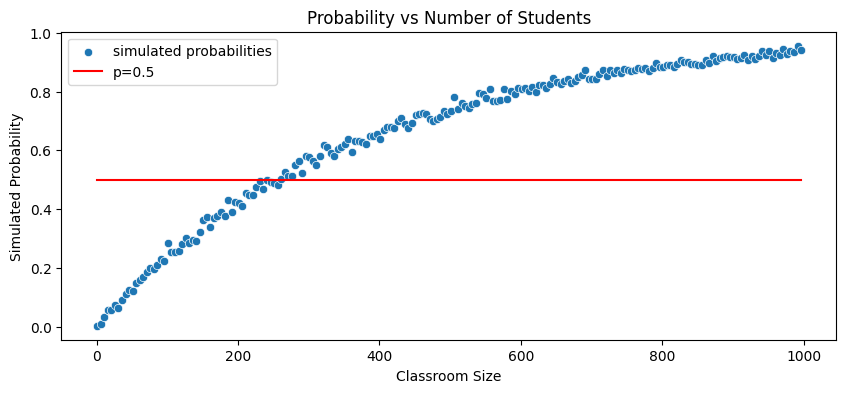

In [ ]:
# 模拟并可视化
simulated_probs_1 = [simulate(problem_1,n_students=n) for n in big_classroom_sizes]
plot_simulated_probs(simulated_probs_1,big_classroom_sizes)

### 生日问题2

---



In [5]:
# 构造解决生日问题2的函数
def problem_2(n_students):

  # 生成包含n_students个随机整数的数组，每个整数在0-364之间，代表每个学生的生日
  gen_bdays = np.random.randint(0,365,(n_students))

  # 随机选择一个学生
  rnd_index = np.random.randint(0,len(gen_bdays))

  # 获取选择的这个学生的生日
  rnd_bday = gen_bdays[rnd_index]

  # 把这个学生的生日从生日池中删除
  remaining_bdays = np.delete(gen_bdays,rnd_index,axis=0)

  # 检查生日学生生日中是否有和这个生日相同的
  return rnd_bday in remaining_bdays

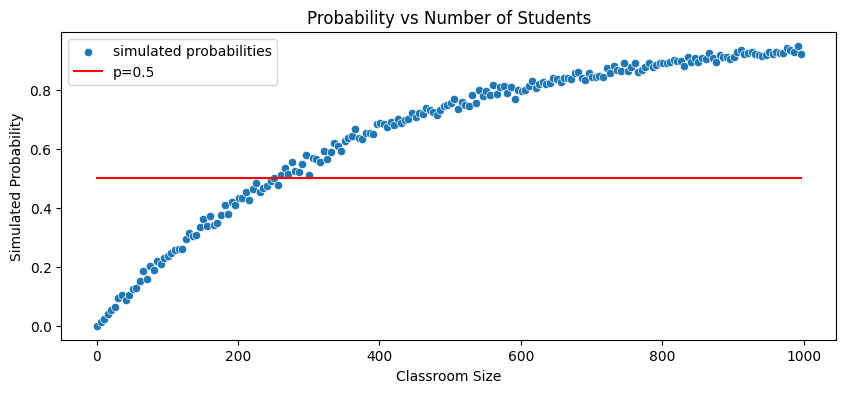

In [6]:
# 模拟
simulated_probs_2 = [simulate(problem_2,n_students=n) for n in big_classroom_sizes]
plot_simulated_probs(simulated_probs_2,big_classroom_sizes)

### 生日问题3

---



In [9]:
# 构造解决生日问题3的函数
def problem_3(n_students):

  # 生成包含n_students个随机整数的数组，每个整数在0-364之间，代表每个学生的生日
  gen_bdays = np.random.randint(0,365,(n_students))

  # 将数组转换为集合，自动去重，将集合转换回列表，将列表转换为数组
  unique_bdays = np.array(list(set(gen_bdays)))

  # 检查原数组是否有重复
  return len(unique_bdays) != len(gen_bdays)

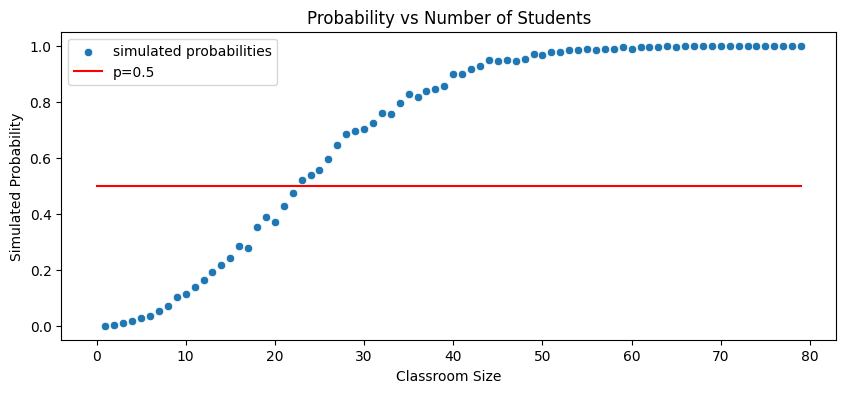

In [10]:
# 模拟
simulated_probs_3 = [simulate(problem_3,n_students=n) for n in small_classroom_sizes]
plot_simulated_probs(simulated_probs_3,small_classroom_sizes)

### 生日问题4

---



In [11]:
# 构造解决生日问题4的函数
def problem_4(n_students):

  # 生成包含n_students个随机整数的数组，每个整数在0-364之间，代表每个学生的生日
  gen_bdays_1 = np.random.randint(0,365,(n_students))
  gen_bdays_2 = np.random.randint(0,365,(n_students))

  # 检查两个数组中是否存在相同的数
  return np.isin(gen_bdays_1,gen_bdays_2).any()

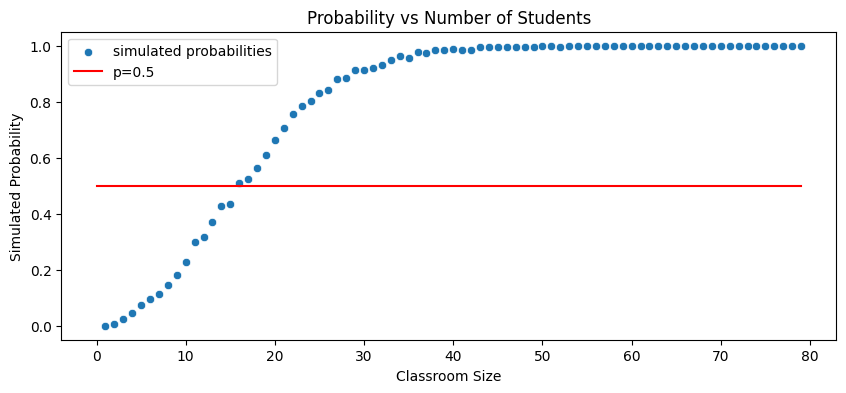

In [12]:
# 模拟
simulated_probs_4 = [simulate(problem_4,n_students=n) for n in small_classroom_sizes]
plot_simulated_probs(simulated_probs_4,small_classroom_sizes)

## 蒙提霍尔问题（The Monty Hall Problem）

---

